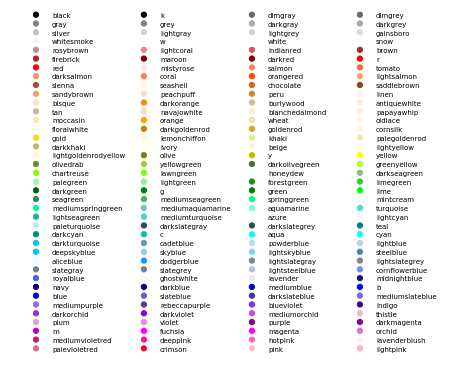

In [29]:
"""
========================
Visualizing named colors
========================

Simple plot example with the named colors and its visual representation.
"""
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(6, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)-w/8
    xf_line = w * (col + 0.25)-w/8
    xi_text = w * (col + 0.3)-w/8

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    #ax.hlines(y + h * 0.1, xi_line, xf_line,
     #         color=colors[name], linewidth=(h * 0.6))
    ax.add_artist(plt.Circle(((xf_line+xi_line)/2, y + h * 0.1), h*0.3, color=colors[name]))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()
fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/colors.pdf", bbox_inches='tight')

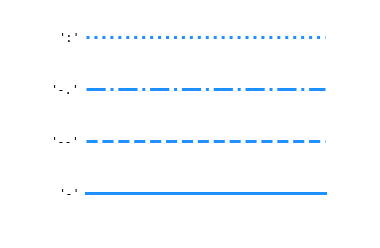

In [3]:
import numpy as np


color = 'dodgerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


# Plot all line styles.
fig, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.1, y, repr(linestyle), **text_style)
    ax.plot(y * points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)

plt.show()
fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/lines.pdf", bbox_inches='tight')

In [4]:
from matplotlib.lines import Line2D


points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    mfc="C0", mec="C0")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

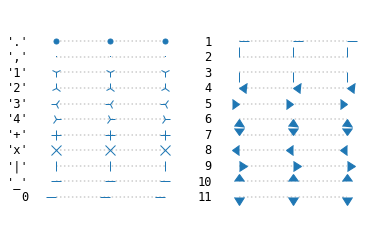

In [5]:
fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
    format_axes(ax)

plt.show()
fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/markers1.pdf", bbox_inches='tight')

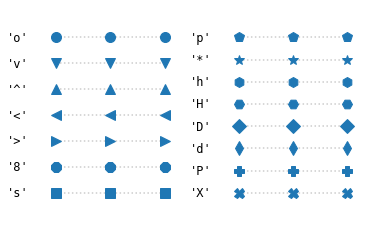

In [6]:
fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
    format_axes(ax)

plt.show()
fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/markers2.pdf", bbox_inches='tight')

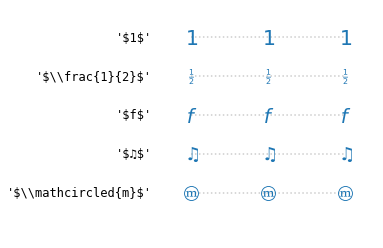

In [7]:

fig, ax = plt.subplots()
fig.subplots_adjust(left=0.4)

marker_style.update(mec="None", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$",
           r"$\mathcircled{m}$"]


for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot(y * points, marker=marker, **marker_style)
format_axes(ax)

plt.show()
fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/markers3.pdf", bbox_inches='tight')

/home/vittorio/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vittorio/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vittorio/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until expli

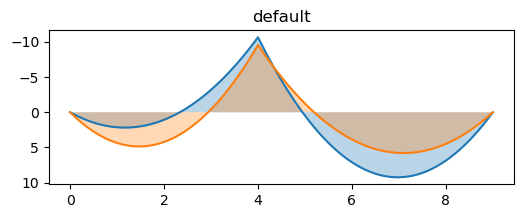

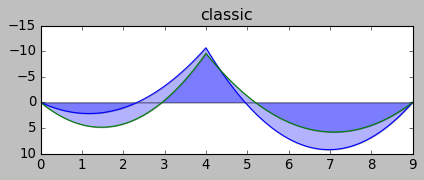

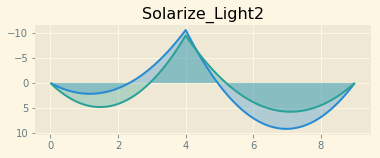

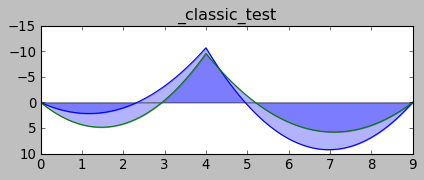

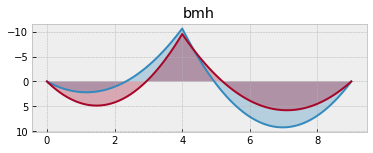

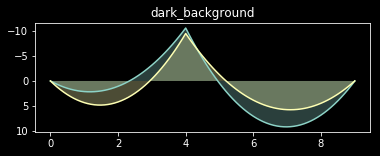

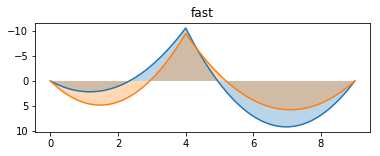

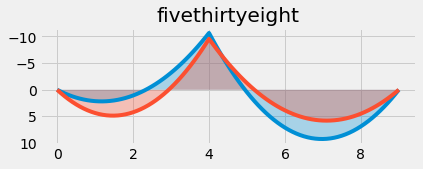

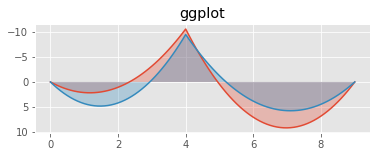

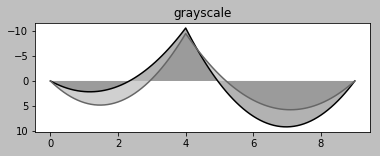

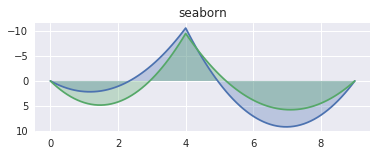

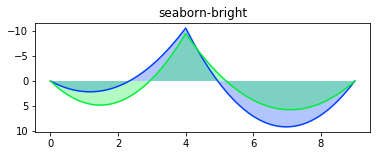

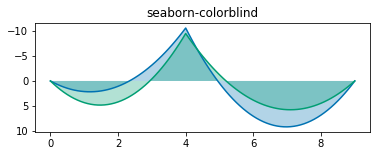

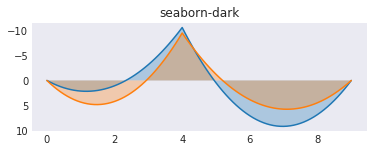

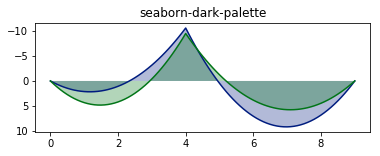

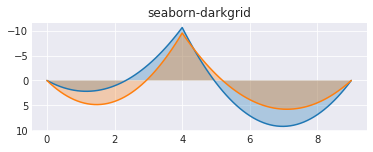

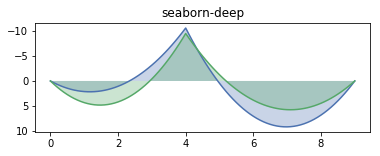

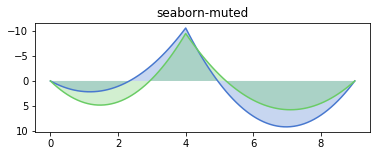

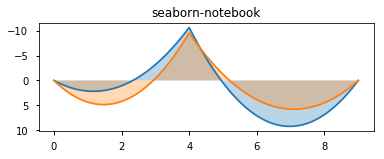

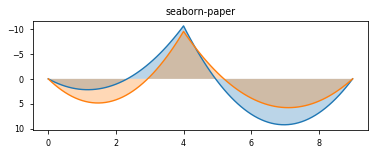

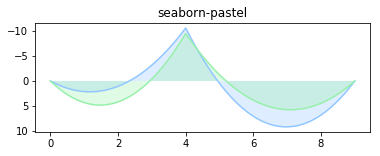

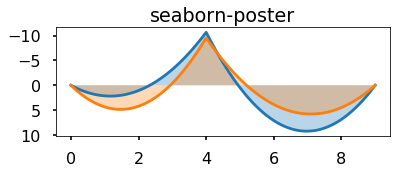

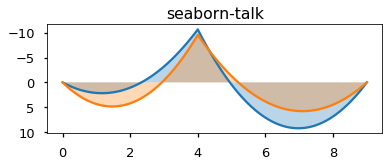

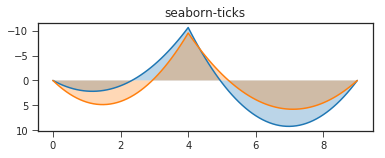

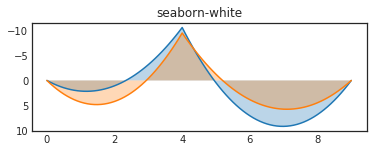

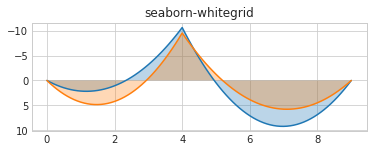

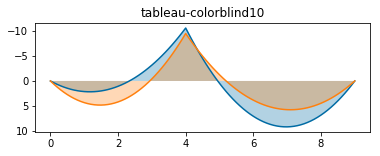

In [20]:
import pandas as pd
data=pd.read_csv("beam.csv")
x=np.array(data.x)
M1=np.array(data.M1)
M2=np.array(data.M2)


style_list = ['default', 'classic'] + sorted(
    style for style in plt.style.available if style != 'classic')
nstyles=len(style_list)

ncols=4

for i in range(nstyles):
    with plt.style.context(style_list[i]):
        fig, ax=plt.subplots(figsize=(6,2))
        ax.invert_yaxis()
        ax.plot(x,M1)
        ax.plot(x,M2)
        ax.fill_between(x, M1, alpha=0.3)
        ax.fill_between(x, M2, alpha=0.3)
        ax.set_title(style_list[i])
        fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/cmaps/style"+str(i)+".pdf", bbox_inches='tight')

plt.show()

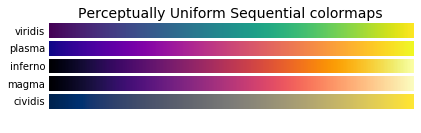

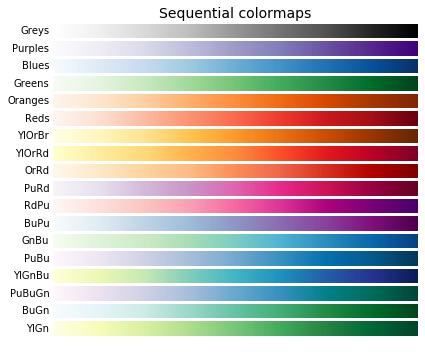

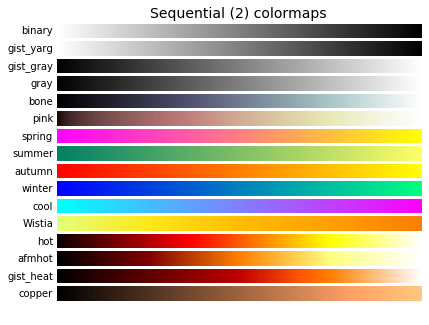

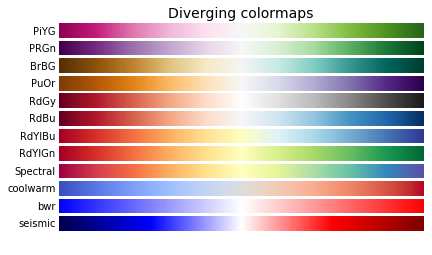

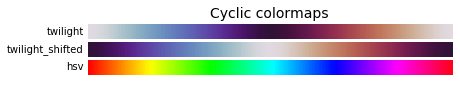

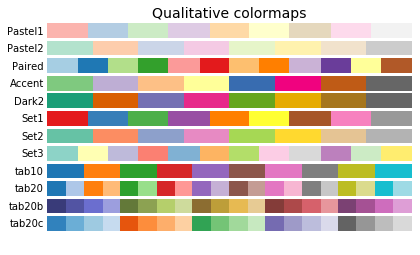

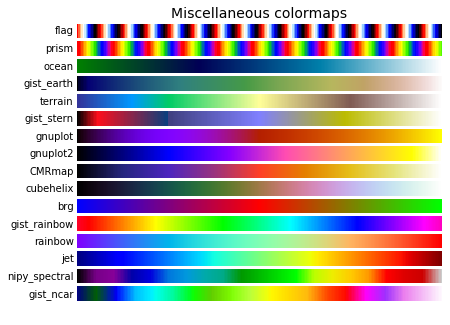

In [36]:
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, i):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()
    fig.savefig("/home/vittorio/MEGA/libro/latex/matplotlib/pictures/cmaps2/cmap"+str(i)+".pdf", bbox_inches='tight')

i=0
for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, i)
    i+=1

plt.show()